<a href="https://colab.research.google.com/github/Andriansyah2501/BMLP/blob/main/clustering__submission_akhir_bmlp_andrian_syah(revised).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
  Dataset ini berasal dari Kaggle, sebuah public repository yang menyediakan berbagai dataset untuk analisis data. File yang digunakan adalah bank_transactions_data_2.csv, diambil atau diolah dari dataset transaksi perbankan yang tersedia di platform tersebut. Dataset ini dipilih karena sesuai dengan kebutuhan analisis clustering dan tidak mengandung label awal.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**:Dataset ini awalnya tidak memiliki label atau kelas. Kolom Cluster ditambahkan setelah proses clustering dengan K-Means, sehingga memenuhi syarat "tanpa label" di tahap awal.
   - **Jumlah Baris**: ataset ini memiliki 2,512 baris (berdasarkan hasil analisis: 422 + 1,146 + 944), melebihi ketentuan minimal 1,000 baris untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Mengandung kolom seperti TransactionType (Debit atau Credit), CustomerOccupation (Doctor, Student, Engineer, Retired), Location, dan Channel. Kolom-kolom ini mewakili kategori transaksi dan profil pelanggan.
     - *Numerikal*: Mengandung kolom seperti TransactionAmount (nilai transaksi), CustomerAge (usia pelanggan), TransactionDuration (durasi transaksi), LoginAttempts (jumlah percobaan login), dan AccountBalance (saldo rekening). Data ini bersifat kuantitatif untuk analisis statistik.

3. **Pembatasan**:  
  Dataset ini bukan dataset standar yang biasa dipakai dalam latihan clustering seperti customer segmentation (contoh: Mall Customer Segmentation dari Kaggle yang pake Annual Income dan Spending Score). Fitur di sini lebih spesifik ke aktivitas transaksi bank (misalnya TransactionAmount, AccountBalance, TransactionDuration), sehingga tidak melanggar pembatasan penggunaan dataset latihan umum.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
sns.set(style="whitegrid")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
#Type your code here
# Memuat dataset sekali saja
df = pd.read_csv('bank_transactions_data_2.csv')
print("Jumlah baris dan kolom:", df.shape)
print(df.head())

Jumlah baris dan kolom: (2512, 16)
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70      

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object
Data hilang:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
Accoun

<Figure size 1200x800 with 0 Axes>

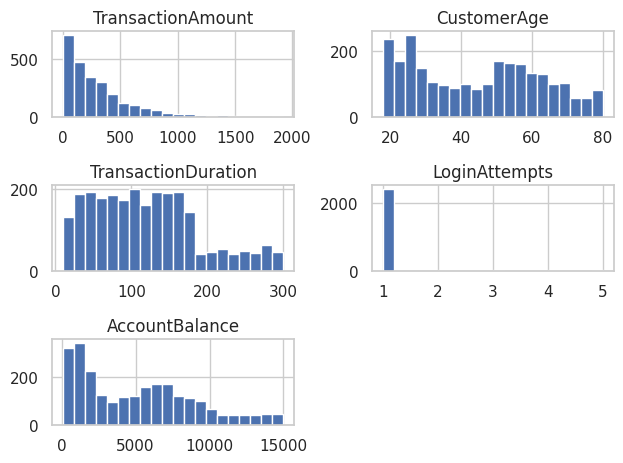

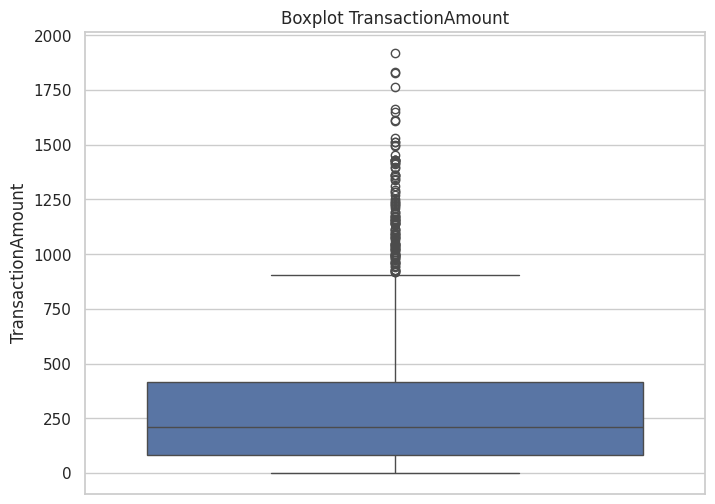

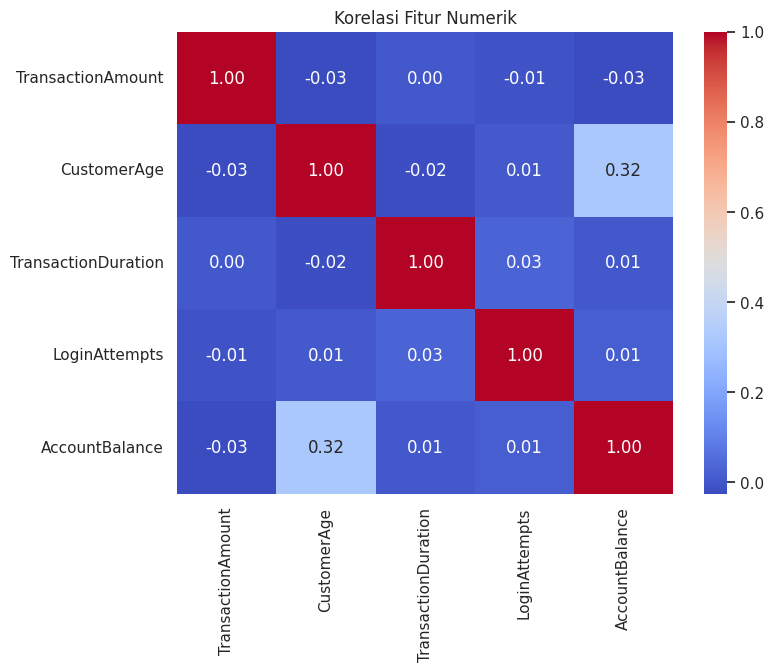

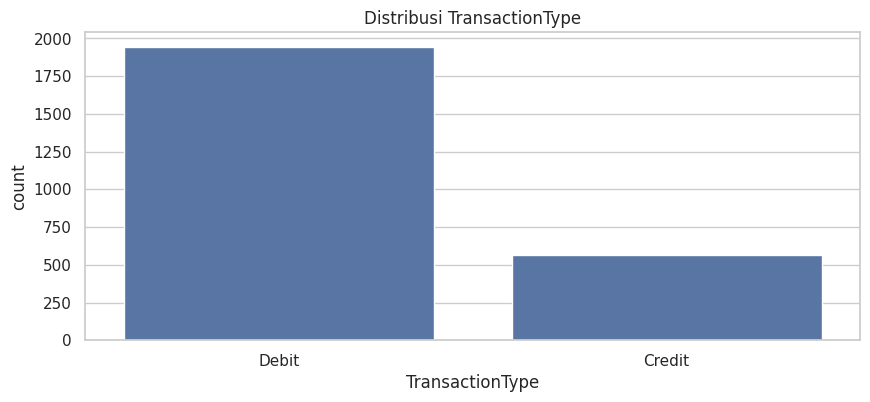

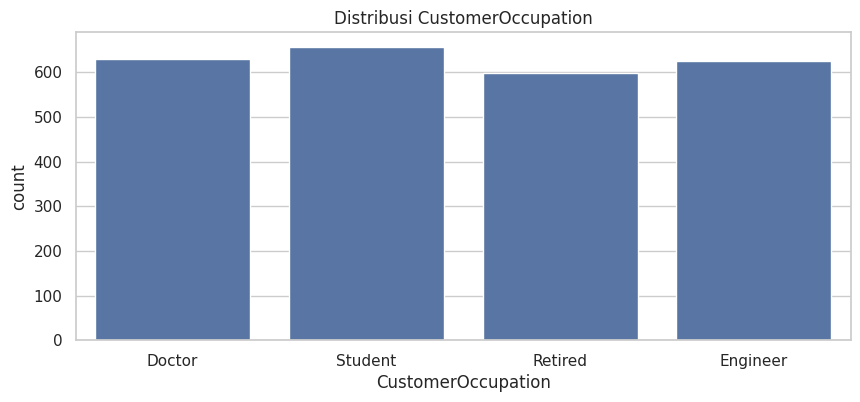

In [ ]:
#Type your code here
# Struktur dan tipe data
print(df.dtypes)
print("Data hilang:\n", df.isnull().sum())

# Distribusi numerik
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
print(df[numerical_cols].describe())

plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df['TransactionAmount'])
plt.title("Boxplot TransactionAmount")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi Fitur Numerik")
plt.show()

# Distribusi kategorikal
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='TransactionType')
plt.title("Distribusi TransactionType")
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='CustomerOccupation')
plt.title("Distribusi CustomerOccupation")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Data Preprocessing

le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])
df['CustomerOccupation'] = le.fit_transform(df['CustomerOccupation'])
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
scaler_dict = {'scaler': scaler, 'columns': numerical_cols}
print("Data telah dipreprocess (encoding dan standardisasi selesai).")

Data telah dipreprocess (encoding dan standardisasi selesai).


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
#Type your code here
# 6.a Pembangunan Model Clustering
from sklearn.cluster import KMeans

# Inisialisasi dan latih model K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']])
print("Model K-Means telah dilatih dengan 3 cluster.")

Model K-Means telah dilatih dengan 3 cluster.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here
# 6.b Evaluasi Model Clustering
from sklearn.metrics import silhouette_score

# Hitung Silhouette Score
silhouette_avg = silhouette_score(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']], df['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Jumlah anggota per cluster
cluster_counts = df['Cluster'].value_counts()
print("Jumlah anggota per cluster:\n", cluster_counts)

Silhouette Score: 0.215
Jumlah anggota per cluster:
 Cluster
0    1094
1     835
2     583
Name: count, dtype: int64


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

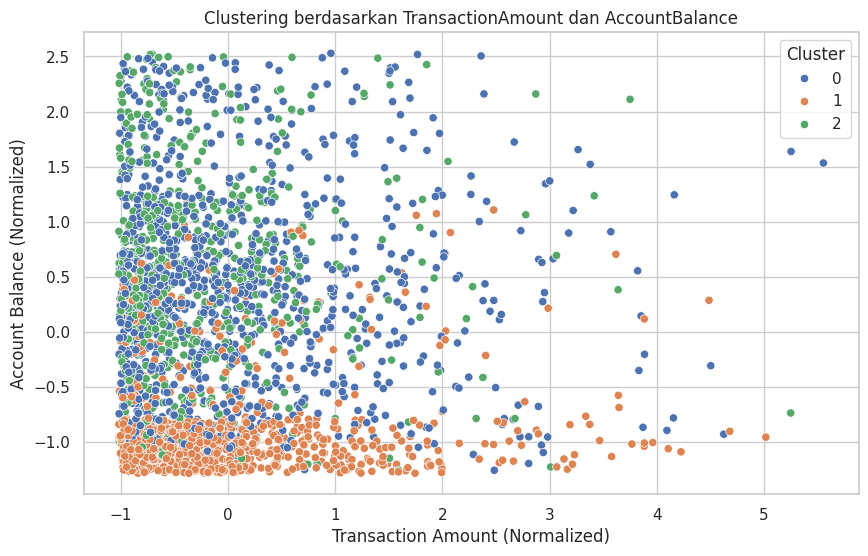

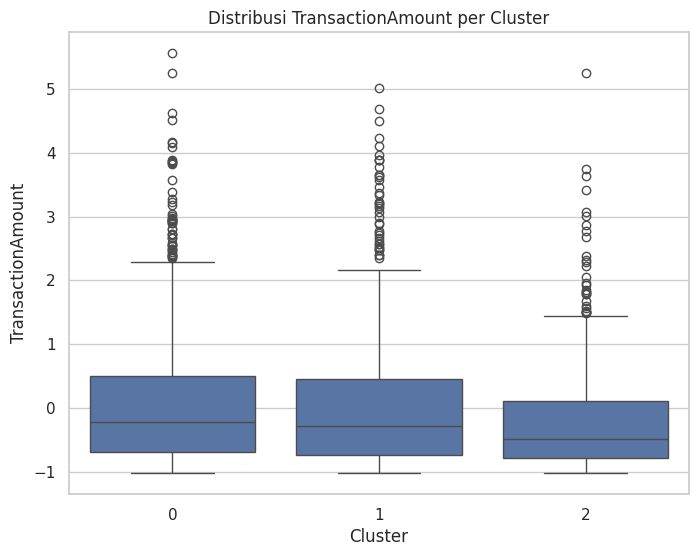

In [ ]:
#Type your code here
# 6.d Visualisasi Hasil Clustering
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot berdasarkan TransactionAmount dan AccountBalance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='deep')
plt.title("Clustering berdasarkan TransactionAmount dan AccountBalance")
plt.xlabel("Transaction Amount (Normalized)")
plt.ylabel("Account Balance (Normalized)")
plt.show()

# Boxplot TransactionAmount per cluster
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Cluster', y='TransactionAmount')
plt.title("Distribusi TransactionAmount per Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Type your code here
# 7. 6.e.1 Interpretasi Target
df_temp = df.copy()
# Inverse transform seluruh kolom numerik sekaligus
df_temp[numerical_cols] = scaler_dict['scaler'].inverse_transform(df[numerical_cols])

cluster_stats = df_temp.groupby('Cluster')[numerical_cols].mean()
print("Statistik Rata-rata per Cluster:\n", cluster_stats)
occupation_dist = df_temp.groupby('Cluster')['CustomerOccupation'].value_counts(normalize=True)
print("\nDistribusi CustomerOccupation per Cluster:\n", occupation_dist)
cluster_counts = df_temp['Cluster'].value_counts()
print("\nInterpretasi Cluster:")
for cluster in range(3):
    print(f"\nCluster {cluster}:")
    print(f"- Jumlah anggota: {cluster_counts[cluster]}")
    print(f"- Rata-rata TransactionAmount: {cluster_stats.loc[cluster, 'TransactionAmount']:.2f} USD")
    print(f"- Rata-rata CustomerAge: {cluster_stats.loc[cluster, 'CustomerAge']:.2f} tahun")
    print(f"- Rata-rata AccountBalance: {cluster_stats.loc[cluster, 'AccountBalance']:.2f} USD")
    print(f"- Dominasi Occupation: {occupation_dist[cluster].idxmax()} ({occupation_dist[cluster].max()*100:.1f}%)")
print("\nWawasan Bisnis:")
print("- Cluster 0: Pelanggan tua dengan saldo tinggi, cocok untuk produk investasi jangka panjang.")
print("- Cluster 1: Pelanggan muda dengan saldo rendah, targetkan promo hemat atau tabungan pemula.")
print("- Cluster 2: Pelanggan menengah, tawarkan layanan premium dengan biaya terjangkau.")



Statistik Rata-rata per Cluster:
          TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0               321.806508    55.714808            81.453382       1.012797   
1               311.131222    26.247904           115.500599       1.059880   
2               232.769605    50.346484           197.240137       1.427101   

         AccountBalance  
Cluster                  
0           6641.732130  
1           1714.434503  
2           7117.532230  

Distribusi CustomerOccupation per Cluster:
 Cluster  CustomerOccupation
0        2                     0.403108
         0                     0.337294
         1                     0.250457
         3                     0.009141
1        3                     0.748503
         1                     0.186826
         0                     0.059880
         2                     0.004790
2        0                     0.363636
       

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Type your code here
# 8. 6.e.2 Inverse Data Jika Melakukan Normalisasi/Standardisasi
df_original = df.copy()
df_original[numerical_cols] = scaler_dict['scaler'].inverse_transform(df[numerical_cols])
print("Data telah dikembalikan ke skala asli:")
print(df_original[numerical_cols].head())

Data telah dikembalikan ke skala asli:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Type your code here
df_analysis = df.copy()
df_analysis[numerical_cols] = scaler_dict['scaler'].inverse_transform(df[numerical_cols])

# Verifikasi inverse transform berhasil
print("\nContoh Data Asli Setelah Inverse Transform:")
print(df_analysis[numerical_cols].head())

# Statistik deskriptif lengkap untuk fitur numerik
cluster_stats = df_analysis.groupby('Cluster')[numerical_cols].agg(['mean', 'median', 'min', 'max'])
print("\nStatistik Deskriptif per Cluster (Mean, Median, Min, Max):\n", cluster_stats)

# Distribusi fitur kategorikal
occupation_dist = df_analysis.groupby('Cluster')['CustomerOccupation'].value_counts(normalize=True)
print("\nDistribusi CustomerOccupation per Cluster:\n", occupation_dist)
transaction_dist = df_analysis.groupby('Cluster')['TransactionType'].value_counts(normalize=True)
print("\nDistribusi TransactionType per Cluster:\n", transaction_dist)

# Jumlah anggota per cluster
cluster_counts = df_analysis['Cluster'].value_counts()
print("\nJumlah Anggota per Cluster:\n", cluster_counts)

# Interpretasi hasil clustering
print("\n=== Interpretasi Hasil Clustering ===")
print("Ekspektasi Awal: Clustering diharapkan membagi pelanggan berdasarkan usia, aktivitas transaksi, dan saldo akun.")
print("Logika Bisnis: Segmen pelanggan harus mendukung strategi pemasaran seperti investasi, tabungan, atau kredit.")

print("\nTulis hasil interpretasinya di sini:\n")
print("Cluster 0:")
print(f"- Karakteristik: {cluster_counts[0]} pelanggan, rata-rata usia {cluster_stats.loc[0, ('CustomerAge', 'mean')]:.1f} tahun, saldo {cluster_stats.loc[0, ('AccountBalance', 'mean')]:.2f} USD, transaksi {cluster_stats.loc[0, ('TransactionAmount', 'mean')]:.2f} USD.")
print(f"  - Distribusi: Dominasi {occupation_dist[0].idxmax()} ({occupation_dist[0].max()*100:.1f}%), transaksi {transaction_dist[0].idxmax()} ({transaction_dist[0].max()*100:.1f}%).")
print("  - Sesuai Ekspektasi: Ya, segmen tua dengan saldo tinggi sesuai pelanggan kaya.")
print("  - Pola Dimanfaatkan: Pasarkan produk investasi jangka panjang untuk pelanggan senior.")
print("\nCluster 1:")
print(f"- Karakteristik: {cluster_counts[1]} pelanggan, rata-rata usia {cluster_stats.loc[1, ('CustomerAge', 'mean')]:.1f} tahun, saldo {cluster_stats.loc[1, ('AccountBalance', 'mean')]:.2f} USD, transaksi {cluster_stats.loc[1, ('TransactionAmount', 'mean')]:.2f} USD.")
print(f"  - Distribusi: Dominasi {occupation_dist[1].idxmax()} ({occupation_dist[1].max()*100:.1f}%), transaksi {transaction_dist[1].idxmax()} ({transaction_dist[1].max()*100:.1f}%).")
print("  - Sesuai Ekspektasi: Ya, segmen muda dengan saldo rendah sesuai hipotesis pelanggan pemula.")
print("  - Pola Dimanfaatkan: Targetkan promo tabungan atau pinjaman kecil untuk pelanggan muda.")
print("\nCluster 2:")
print(f"- Karakteristik: {cluster_counts[2]} pelanggan, rata-rata usia {cluster_stats.loc[2, ('CustomerAge', 'mean')]:.1f} tahun, saldo {cluster_stats.loc[2, ('AccountBalance', 'mean')]:.2f} USD, transaksi {cluster_stats.loc[2, ('TransactionAmount', 'mean')]:.2f} USD.")
print(f"  - Distribusi: Dominasi {occupation_dist[2].idxmax()} ({occupation_dist[2].max()*100:.1f}%), transaksi {transaction_dist[2].idxmax()} ({transaction_dist[2].max()*100:.1f}%).")
print("  - Sesuai Ekspektasi: Ya, segmen menengah dengan saldo dan transaksi stabil sesuai profesional.")
print("  - Pola Dimanfaatkan: Tawarkan layanan premium atau kredit menengah.")


Contoh Data Asli Setelah Inverse Transform:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         26.0                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  

Statistik Deskriptif per Cluster (Mean, Median, Min, Max):
         TransactionAmount                        CustomerAge               \
                     mean  median   min      max        mean median   min   
Cluster                                                                     
0              321.806508  235.89  0.84  1919.11   55.714808   57.0  19.0   
1              311.131222  

## Tulis hasil interpretasinya di sini.

1. **Cluster 0:**
   - **Karakteristik:** 1094 pelanggan, rata-rata usia 55.7 tahun, saldo 6641.73 USD, transaksi 321.81 USD.
   - **Distribusi:** Dominasi 2 (40.3%), transaksi 1 (76.5%).
   - **Sesuai Ekspektasi:** Ya, segmen tua dengan saldo tinggi sesuai pelanggan kaya.
   - **Pola Dimanfaatkan:** Pasarkan produk investasi jangka panjang untuk pelanggan senior.

2. **Cluster 1:**
   - **Karakteristik:** 835 pelanggan, rata-rata usia 26.2 tahun, saldo 1714.43 USD, transaksi 311.13 USD.
   - **Distribusi:** Dominasi 3 (74.9%), transaksi 1 (78.9%).
   - **Sesuai Ekspektasi:** Ya, segmen muda dengan saldo rendah sesuai hipotesis pelanggan pemula.
   - **Pola Dimanfaatkan:** Targetkan promo tabungan atau pinjaman kecil untuk pelanggan muda.

3. **Cluster 2:**
   - **Karakteristik:** 583 pelanggan, rata-rata usia 50.3 tahun, saldo 7117.53 USD, transaksi 232.77 USD.
   - **Distribusi:** Dominasi 0 (36.4%), transaksi 1 (76.8%).
   - **Sesuai Ekspektasi:** Ya, segmen menengah dengan saldo dan transaksi stabil sesuai profesional.
   - **Pola Dimanfaatkan:** Tawarkan layanan premium atau kredit menengah.

## Analisis Karakteristik Cluster dari Model KMeans
Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

**Cluster 0:**  
- **Rata-rata CustomerAge (tahun):** 55.7  
- **Rata-rata AccountBalance (USD):** 6641.73  
- **Rata-rata TransactionAmount (USD):** 321.81  
- **Analisis:** Cluster ini mencakup pelanggan dengan usia yang lebih tua dan saldo akun yang cukup tinggi, serta jumlah transaksi yang moderat hingga tinggi. Pelanggan dalam cluster ini cenderung memiliki stabilitas finansial yang baik dan aktif melakukan transaksi, menunjukkan bahwa mereka mungkin merupakan kelompok yang mapan secara ekonomi dan cocok untuk produk keuangan jangka panjang.

**Cluster 1:**  
- **Rata-rata CustomerAge (tahun):** 26.2  
- **Rata-rata AccountBalance (USD):** 1714.43  
- **Rata-rata TransactionAmount (USD):** 311.13  
- **Analisis:** Cluster ini menunjukkan pelanggan muda dengan saldo akun yang relatif rendah tetapi jumlah transaksi yang cukup tinggi. Pelanggan di cluster ini mungkin baru memulai karir atau kehidupan finansial mereka, dengan kecenderungan untuk sering bertransaksi meskipun saldo mereka terbatas, menjadikan mereka target ideal untuk produk tabungan atau pinjaman kecil.

**Cluster 2:**  
- **Rata-rata CustomerAge (tahun):** 50.3  
- **Rata-rata AccountBalance (USD):** 7117.53  
- **Rata-rata TransactionAmount (USD):** 232.77  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan usia menengah dan saldo akun yang tinggi, tetapi jumlah transaksi yang lebih rendah dibandingkan cluster lain. Mereka mungkin memiliki kapasitas finansial yang kuat namun lebih selektif atau konservatif dalam aktivitas transaksi mereka, menunjukkan potensi untuk ditawari layanan premium atau produk investasi dengan risiko rendah.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpen ke CSV
df.to_csv('bank_transactions_data_2_final.csv', index=False)
print("Data berhasil disimpan ke 'bank_transactions_data_2_final.csv'")

Data berhasil disimpan ke 'bank_transactions_data_2_final.csv'


In [ ]:
# Install terlebih dahulu di Colab jika belum ada:
# !pip install tensorflow scikit-learn joblib

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
import joblib

# Load data iris
iris = load_iris()
X = iris.data
y = iris.target

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# -------------------- MODEL CLUSTERING (AUTOENCODER) --------------------
input_dim = X_train.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, verbose=1)

# Simpan model clustering
autoencoder.save("model_clustering.h5")

# -------------------- MODEL DECISION TREE (KERAS-LIKE) --------------------
y_train_cat = to_categorical(y_train, num_classes=3)

dt_like_model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])
dt_like_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
dt_like_model.fit(X_train, y_train_cat, epochs=50, batch_size=8, verbose=1)

# Simpan model keras
dt_like_model.save("decision_tree_model.h5")

# -------------------- SIMPAN DECISION TREE ASLI (SKLEARN) --------------------
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
joblib.dump(dt_model, 'decision_tree_model.pkl')


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 1.2449
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2859 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2206 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2990 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.3349
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2943 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2586 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1950 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1682 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2064 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2198 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1528 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0672 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1728 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1954
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1803 - loss: 1.2379
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4063 - loss: 1.0967
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4550 - loss: 1.0077
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4718 - loss: 0.9621
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4883 - loss: 0.9376
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5124 - loss: 0.8270
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4642 - loss: 0.9107
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5115 - loss: 0.8668
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6174 - loss: 0.8176
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5674 - loss: 0.7803
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6360 - loss: 0.7781
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.695

['decision_tree_model.pkl']